<a href="https://colab.research.google.com/github/araujorobert/Multivariant-Statistics/blob/main/C%C3%B3pulas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cópulas
Digamos que medimos dos variables que NO están Normalmente distribuidas. Por ejemplo, el nivel máximo de varios ríos durante un cierto período de tiempo y Además, el número de veces que cada río causó inundaciones. La distribución de probabilidad del nivel máximo del río es una Gumbel. La cantidad de veces que se produjo una inundación se modela de acuerdo con una distribución Beta.

Es bastante razonable suponer que el nivel máximo y el número de inundaciones van a estar correlacionados. Si un río crece demasiado es probable que también haya inundaciones. Sin embargo, aquí nos encontramos con un problema: ¿cómo debemos modelar esa distribución de probabilidad? Arriba solo especificamos las distribuciones para las variables individuales, independientemente de la otra (es decir, las marginales). En realidad, estamos lidiando con una distribución conjunta de ambas variables juntas.

Cópulas al rescate.

Las cópulas nos permiten descomponer una distribución de probabilidad conjunta en sus marginales (que, por definición, no tienen correlación). Es una función que las une y, por tanto, nos permite especificar la correlación por separado.

Antes de sumergirnos en ello, primero debemos aprender cómo podemos transformar variables aleatorias arbitrarias en uniformes y viceversa. Todo lo que necesitaremos es el excelente módulo **scipy.stats** y **seaborn** para dibujar.

In [1]:
# Veamos la utilidad de las funciones cópulas
import scipy
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import stats

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


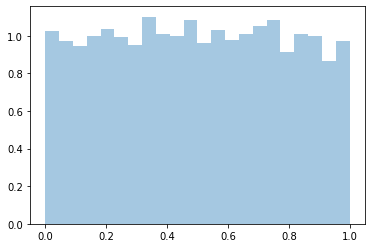

In [2]:
# Generemos datos uniformemente distribuidos (Como las copulas están definidas en [0,1] generamos datos en dicho intervalo)
x = stats.uniform(0,1).rvs(10000)
sb.distplot(x,kde=False, norm_hist=True)

Ahora vamos a transformar estas muestras para que en lugar de uniformes, ahora esten normalemente distribuidas. La transformación que hace esto es la inversa de la función de distribución (o densidad acumulada) (CDF) de la distribución normal (que podemos obtener en scipy.stats con ppf):

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


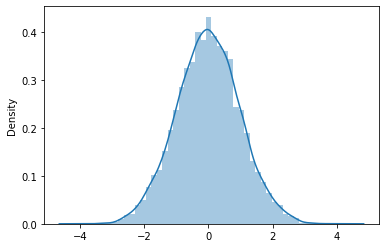

In [3]:
norm = stats.distributions.norm() # definimos la distribución
x_trans = norm.ppf(x)             # la aplicamos a la x uniforme
sb.distplot(x_trans)              # graficamos

Si trazamos ambas juntas, podemos obtener una intuición de cómo se ve la CDF inversa y cómo funciona:



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


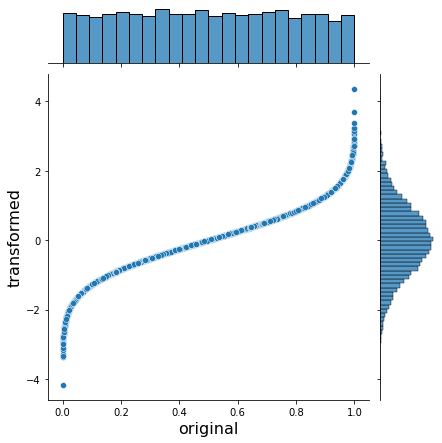

In [4]:
h = sb.jointplot(x, x_trans)#, stat_func=None)
h.set_axis_labels('original', 'transformed', fontsize=16);

Como puedes ver, la CDF inversa estira las regiones externas de la uniforme para producir un normal.

Podemos hacer esto para distribuciones de probabilidad arbitrarias (univariadas), como la Beta:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


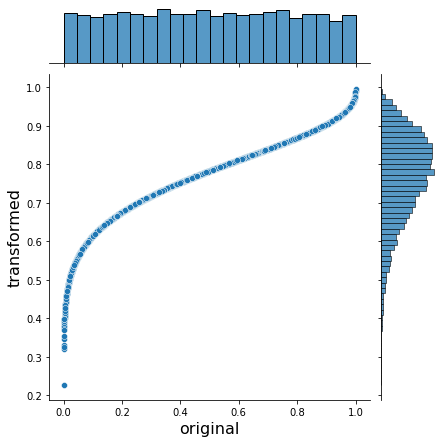

In [5]:
beta = stats.distributions.beta(a=10,b=3) # Generamos la distribucion beta
x_trans = beta.ppf(x)                     # la aplicamos a la x uniforme
h = sb.jointplot(x, x_trans)              # graficamso
h.set_axis_labels('original', 'transformed', fontsize=16);

O la Gumbel:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


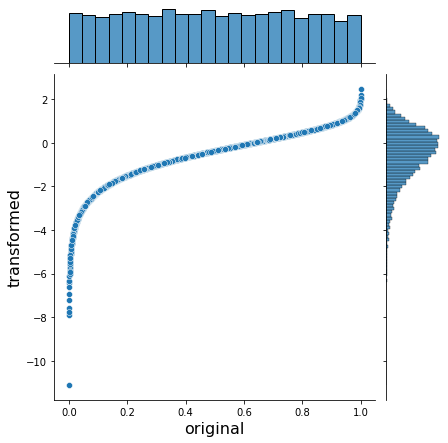

In [6]:
gumbel = stats.distributions.gumbel_l()  # generamos la distribución gumble
x_trans = gumbel.ppf(x)                  # la aplicamos a la x uniforme
h = sb.jointplot(x, x_trans)             # graficamos
h.set_axis_labels('original', 'transformed', fontsize=16);

Para hacer la transformación opuesta de una distribución arbitraria a la Uniforme(0, 1) simplemente aplicamos la inversa de la CDF inversa, es decir, la CDF:



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


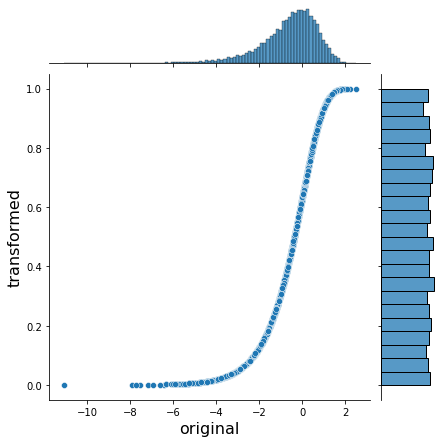

In [7]:
x_trans_trans = gumbel.cdf(x_trans)
h = sb.jointplot(x_trans, x_trans_trans)
h.set_axis_labels('original', 'transformed', fontsize=16);

Bien, entonces sabemos cómo transformar de cualquier distribución a una uniforme, y viceversa. En matemáticas, esto se llama la transformación integral de probabilidad.

### Añadiendo correlaciones mediante el uso de la Cópula Gaussiana.

¿Cómo nos ayuda esto con nuestro problema de crear una distribución de probabilidad conjunta personalizada? En realidad ya casi hemos terminado. Sabemos cómo convertir cualquier cosa distribuida uniformemente en una distribución de probabilidad arbitraria. Eso significa que solo necesitamos generar datos distribuidos uniformemente con las correlaciones que queremos.

¿Como hacemos eso?

1. Simulamos a partir de una Gaussiana multivariante con la estructura de correlación específica que queremos.
2. Transformamos para que las marginales sean uniformes.
3. Transformamos las marginales uniformes a lo que queramos.

Vamos a crear muestras a partir de una Normal multivariante correlacionada:

In [10]:
mvnorm = stats.multivariate_normal(mean=[0, 0], cov=[[1., 0.5], 
                                                     [0.5, 1.]])
# Generando la Normal multivariante con correlaciones .5
x = mvnorm.rvs(10000)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


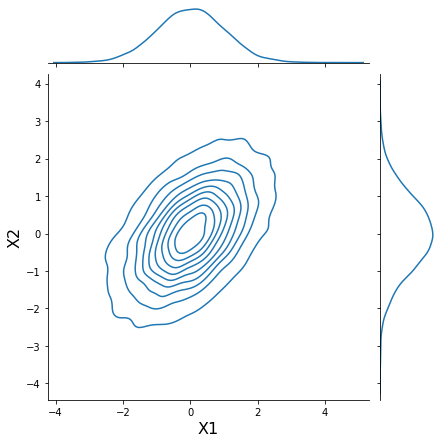

In [11]:
h = sb.jointplot(x[:, 0], x[:, 1], kind='kde')
h.set_axis_labels('X1', 'X2', fontsize=16);

Ahora usaremos lo que aprendimos arriba para "uniformizar" las marginales:



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


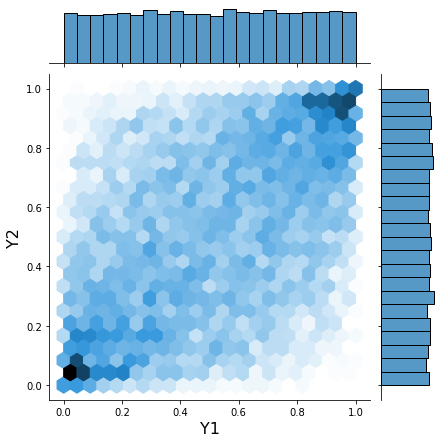

In [13]:
norm = stats.norm()
x_unif = norm.cdf(x)
h = sb.jointplot(x_unif[:,0],x_unif[:,1], kind='hex')
h.set_axis_labels('Y1', 'Y2', fontsize=16);


Este diagrama conjunto suele ser cómo se visualizan las cópulas.

Ahora solo transformamos los marginales nuevamente a lo que queremos (Gumbel y Beta):

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0`, but please update your code.
  warnings.warn(msg, UserWarning)


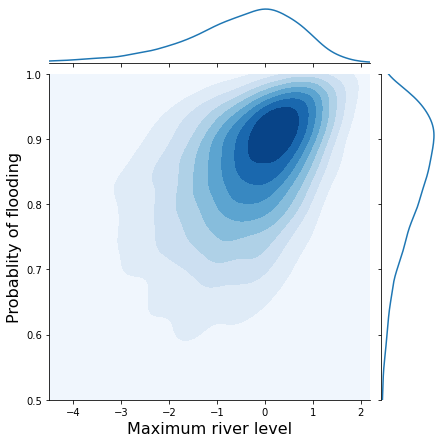

In [31]:
m1 = stats.gumbel_l()
m2 = stats.beta(a=10, b=2)

x1_trans = m1.ppf(x_unif[:, 0])
x2_trans = m2.ppf(x_unif[:, 1])

h = sb.jointplot(x1_trans, x2_trans, kind='kde', cmap='Blues', shade=True, shade_lowest=True, xlim=(-4.5, 2.2), ylim=(.5, 1));
h.set_axis_labels('Maximum river level', 'Probablity of flooding', fontsize=16);

Contrastemos eso con la distribución conjunta sin correlaciones:



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0`, but please update your code.
  warnings.warn(msg, UserWarning)


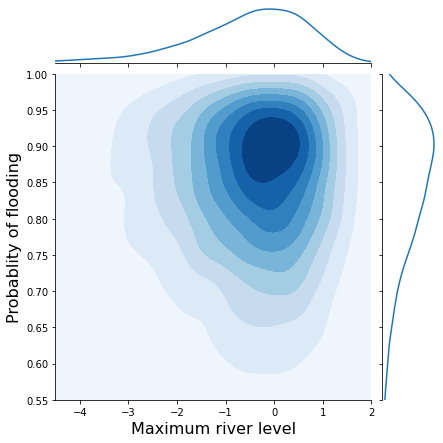

In [30]:
x1 = m1.rvs(10000)
x2 = m2.rvs(10000)

h = sb.jointplot(x1, x2, kind='kde', cmap='Blues', shade=True, shade_lowest=True, xlim=(-4.5, 2), ylim=(.55, 1));
h.set_axis_labels('Maximum river level', 'Probablity of flooding',  fontsize=16);

Entonces, al usar la distribución Uniforme como nuestra base, podemos inducir fácilmente correlaciones y construir de manera flexible distribuciones de probabilidad complejas. Todo esto se extiende directamente a distribuciones de dimensiones superiores también.